<a href="https://colab.research.google.com/github/mraj2018/AIML/blob/master/Lab_External7_PlantBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#1. Read the images and generate the train and test dataset (5 points)

In [116]:
import os
os.chdir('/content/drive/My Drive/Plant-Breed')

!ls

sample_submission.csv  test  train


In [0]:
# Commented as we already extracted...dont want give load onto drive repeatedly

#from zipfile import ZipFile
#with ZipFile('Train/train.zip', 'r') as z:
#  z.extractall()

In [0]:
#from zipfile import ZipFile
#with ZipFile('Test/test.zip', 'r') as z:
 # z.extractall()

In [0]:
x_test=[]
os.chdir('/content/drive/My Drive/Plant-Breed/test')
import cv2
for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(128,128))
    x_test.append(dummy)
    

In [120]:

x_train = []
y_train = []

x_test[0].shape , len(x_test)

((128, 128, 3), 794)

In [121]:
import os
os.chdir('/content/drive/My Drive/Plant-Breed')
!ls

sample_submission.csv  test  train


In [122]:
x_train = []
y_train = []

os.chdir('/content/drive/My Drive/Plant-Breed/train')

import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                #print(j)
                try:
                    #print(i)
                    dummy = cv2.imread('/content/drive/My Drive/Plant-Breed/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)

Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat
7621model.hp5


In [123]:
x_train[0].shape ,len(x_train)

((128, 128, 3), 4750)

In [0]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train_arr = np.array(y_train)
y_train_arr.shape, x_train[0].shape

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y_train_arr = le.fit_transform(y_train_arr)


y_train_cat = np_utils.to_categorical(y_train_arr, num_classes=12)

In [0]:
#2. Divide the data set into Train and validation data sets

In [128]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train_cat, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

3800
950


In [129]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [0]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [132]:
print (x_train2.shape)
print (x_val.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [133]:

print(y_train2.shape)
print(y_val.shape)



(3800, 12)
(950, 12)


In [0]:
#3. Initialize & build the model (10 points) & 4. Optimize the model (5 points)

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense

In [0]:
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam,SGD

In [0]:
model = Sequential()

model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))
model.add(BatchNormalization(input_shape = (128,128,3)))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 12, activation = 'softmax')) 

#optimizer = adam(lr=0.001)
#earlystop = EarlyStopping(patience=5)

sgd = SGD(lr=0.001)

model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 15, 15, 128)       0         
__________

In [139]:
batch_size = 64

history = model.fit(x_train2,y_train2,
                    epochs=10, 
                    batch_size=64,
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 3800 samples, validate on 950 samples
Epoch 1/20
3800/3800 [==============================] - 259s 68ms/step - loss: 0.6300 - acc: 0.7905 - val_loss: 0.6800 - val_acc: 0.7800
Epoch 2/20
3800/3800 [==============================] - 259s 68ms/step - loss: 0.5778 - acc: 0.8076 - val_loss: 0.6766 - val_acc: 0.7832
Epoch 3/20
3800/3800 [==============================] - 259s 68ms/step - loss: 0.5208 - acc: 0.8282 - val_loss: 0.7803 - val_acc: 0.7537
Epoch 4/20
3800/3800 [==============================] - 260s 68ms/step - loss: 0.5155 - acc: 0.8205 - val_loss: 0.6541 - val_acc: 0.7895
Epoch 5/20
3800/3800 [==============================] - 261s 69ms/step - loss: 0.4760 - acc: 0.8389 - val_loss: 0.6859 - val_acc: 0.7747
Epoch 6/20
3800/3800 [==============================] - 259s 68ms/step - loss: 0.4541 - acc: 0.8403 - val_loss: 0.6490 - val_acc: 0.7979
Epoch 7/20
3800/3800 [==============================] - 259s 68ms/step - loss: 0.4324 - acc: 0.8476 - val_loss: 0.7139 - val_acc: 0

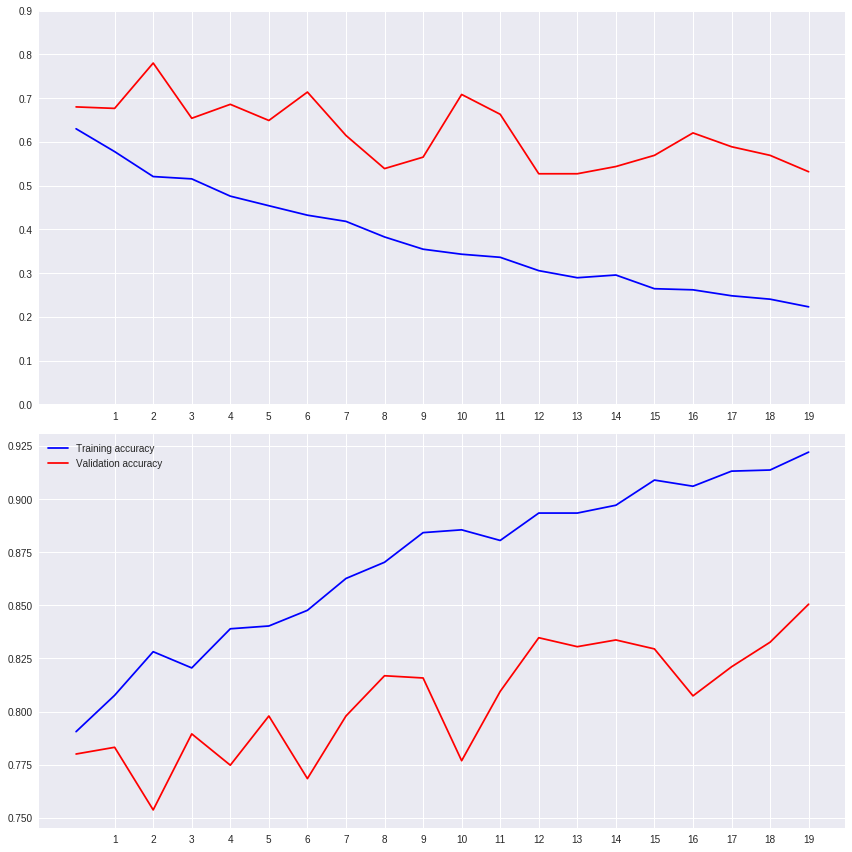

In [143]:
import matplotlib.pyplot as plt
epochs =20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
#5. Predict the accuracy for both train and validation data (5 points)

In [0]:
y_pred = model.predict_classes(x_test)

In [145]:
y_pred_trans = le.inverse_transform(y_pred)

y_pred_trans

array(['Common Chickweed', 'Cleavers', 'Loose Silky-bent', 'Sugar beet',
       'Small-flowered Cranesbill', 'Common Chickweed',
       'Common Chickweed', 'Common Chickweed', 'Common Chickweed',
       'Cleavers', 'Loose Silky-bent', 'Loose Silky-bent', 'Cleavers',
       'Loose Silky-bent', 'Loose Silky-bent', 'Fat Hen', 'Sugar beet',
       'Cleavers', 'Cleavers', 'Loose Silky-bent', 'Sugar beet',
       'Scentless Mayweed', 'Fat Hen', 'Loose Silky-bent',
       'Shepherds Purse', 'Shepherds Purse', 'Loose Silky-bent',
       'Loose Silky-bent', 'Common Chickweed', 'Sugar beet',
       'Scentless Mayweed', 'Fat Hen', 'Scentless Mayweed',
       'Loose Silky-bent', 'Common Chickweed', 'Loose Silky-bent',
       'Common Chickweed', 'Loose Silky-bent', 'Loose Silky-bent',
       'Sugar beet', 'Maize', 'Common Chickweed', 'Cleavers',
       'Loose Silky-bent', 'Scentless Mayweed', 'Loose Silky-bent',
       'Sugar beet', 'Loose Silky-bent', 'Common Chickweed', 'Fat Hen',
       'Charloc

In [0]:
import pandas as pd
Final = pd.DataFrame(columns = ['file', 'species'])
file_list = []
os.chdir('/content/drive/My Drive/Plant-Breed/test')
for i in os.listdir():
  file_list.append(i)
Final['file'] = file_list
Final['species'] = y_pred_trans

In [0]:
os.chdir('/content/drive/My Drive/Plant-Breed/test')
Final.to_csv('Score.csv', index = False)